# From  [Pinned diffusions and Markov bridges](https://arxiv.org/pdf/1711.08617.pdf)

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import _LIB_Ito_Diffusion as Ito
plt.style.use('dark_background')

In [2]:
T = 2
SCHEME_STEPS = int(1e4)
LEGEND_SIZE = 32
FONT_SIZE = 32
plt.rcParams.update({'font.size': FONT_SIZE})

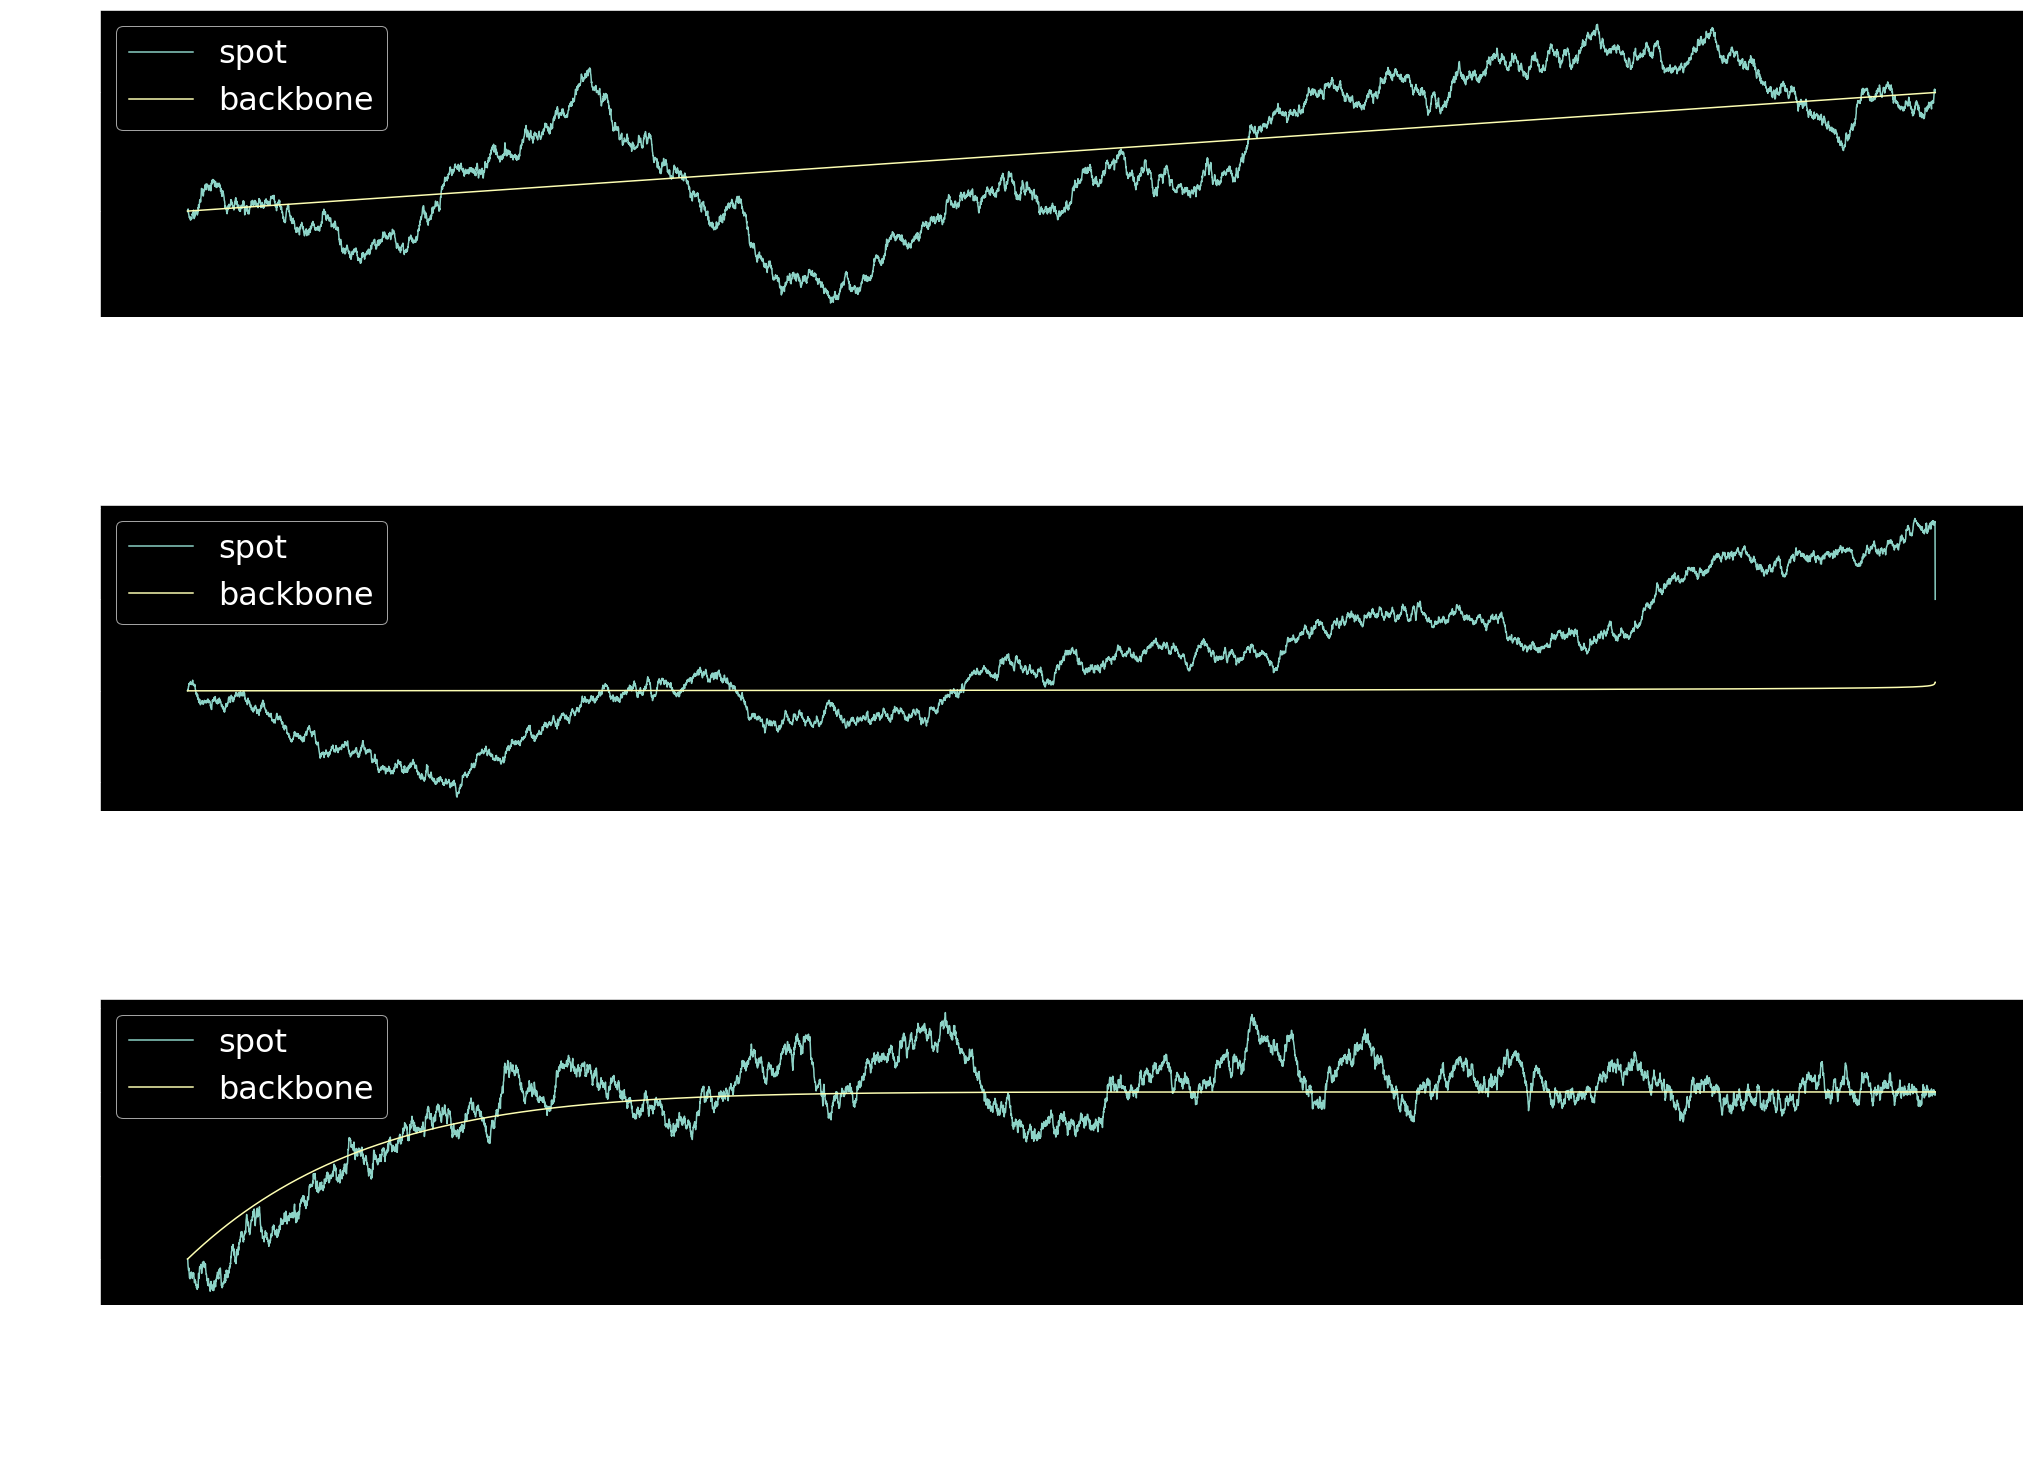

In [3]:
fig, axes = plt.subplots(figsize=(29, 21), nrows=3, ncols=1)

alphas = [1.0, 0.01, 10.0]

for i, ax in enumerate(axes):
    alpha = alphas[i]
    X = Ito.Alpha_pinned_BM(x0=0, T=T, scheme_steps=SCHEME_STEPS, alpha=alpha, vol=1, pin=1)
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\nalpha={:.2}\n'.format(alpha), fontsize=FONT_SIZE)
    ax.set_ylabel('spot', fontsize=FONT_SIZE)
    ax.legend(prop={'size': LEGEND_SIZE})
    ax.tick_params(labelsize=FONT_SIZE)

plt.tight_layout()
plt.show()

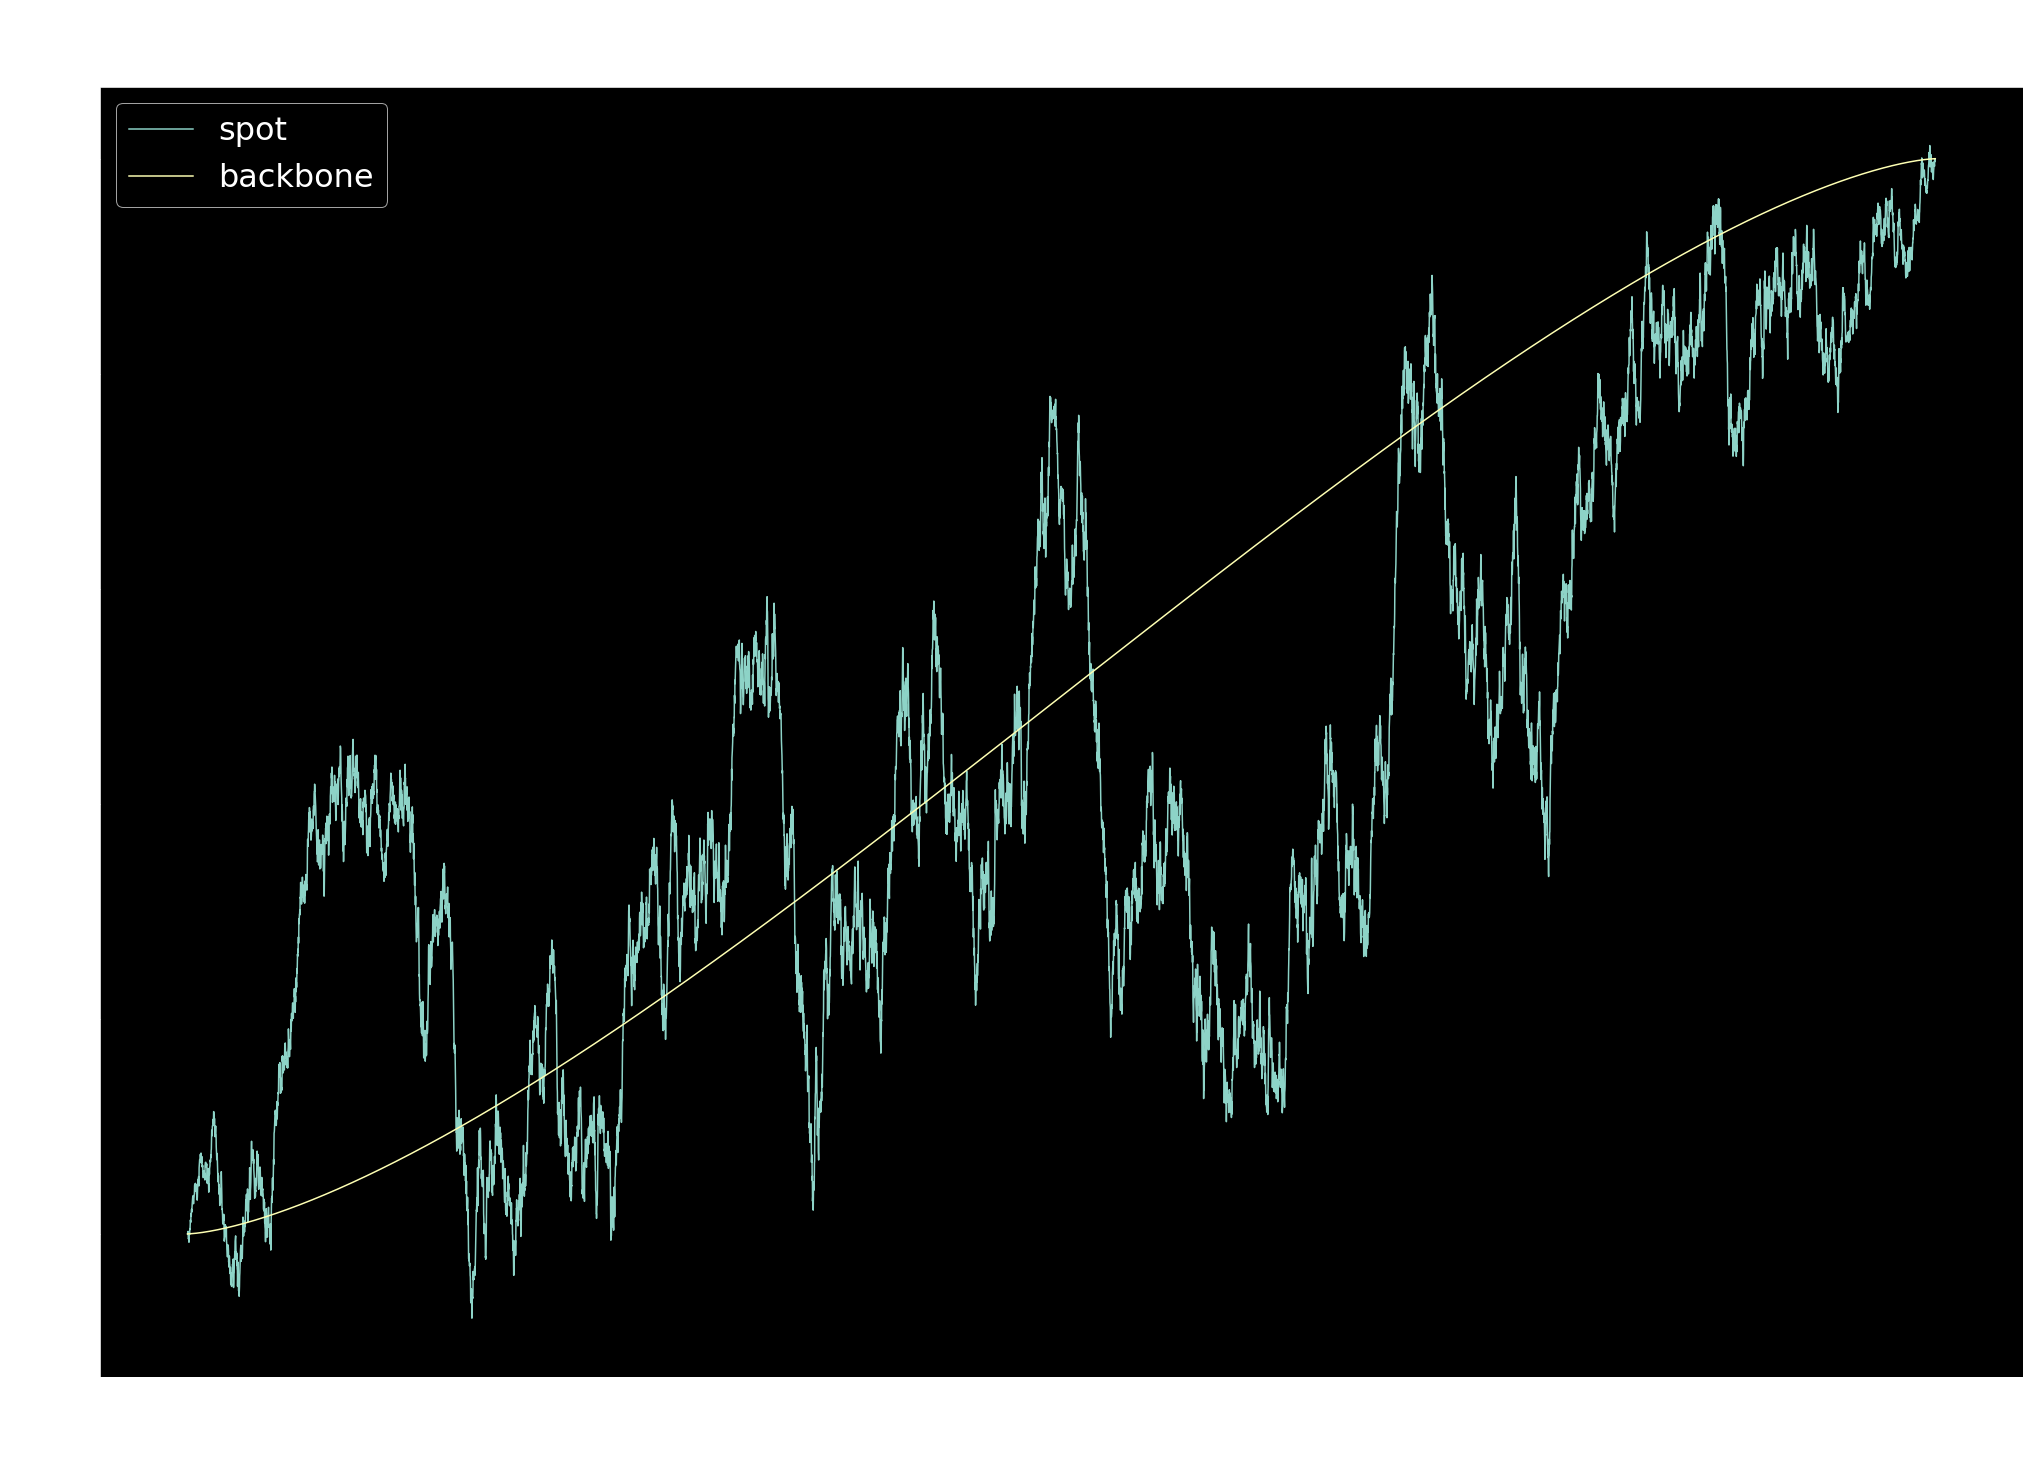

In [4]:
fig, ax = plt.subplots(figsize=(29, 21), nrows=1, ncols=1)

distr = stats.semicircular(loc=1, scale=1)

X = Ito.F_pinned_BM(x0=0, T=T, scheme_steps=SCHEME_STEPS, distr=distr, pin=1)
df = X.simulate()
df.plot(kind='line', ax=ax)

ax.set_xlabel('time', fontsize=FONT_SIZE)
ax.set_ylabel('spot', fontsize=FONT_SIZE)
ax.legend(prop={'size': LEGEND_SIZE})
ax.tick_params(labelsize=FONT_SIZE)
ax.set_title('Semicircular backbone\n')
plt.tight_layout()
plt.show()

/home/sauxpa/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


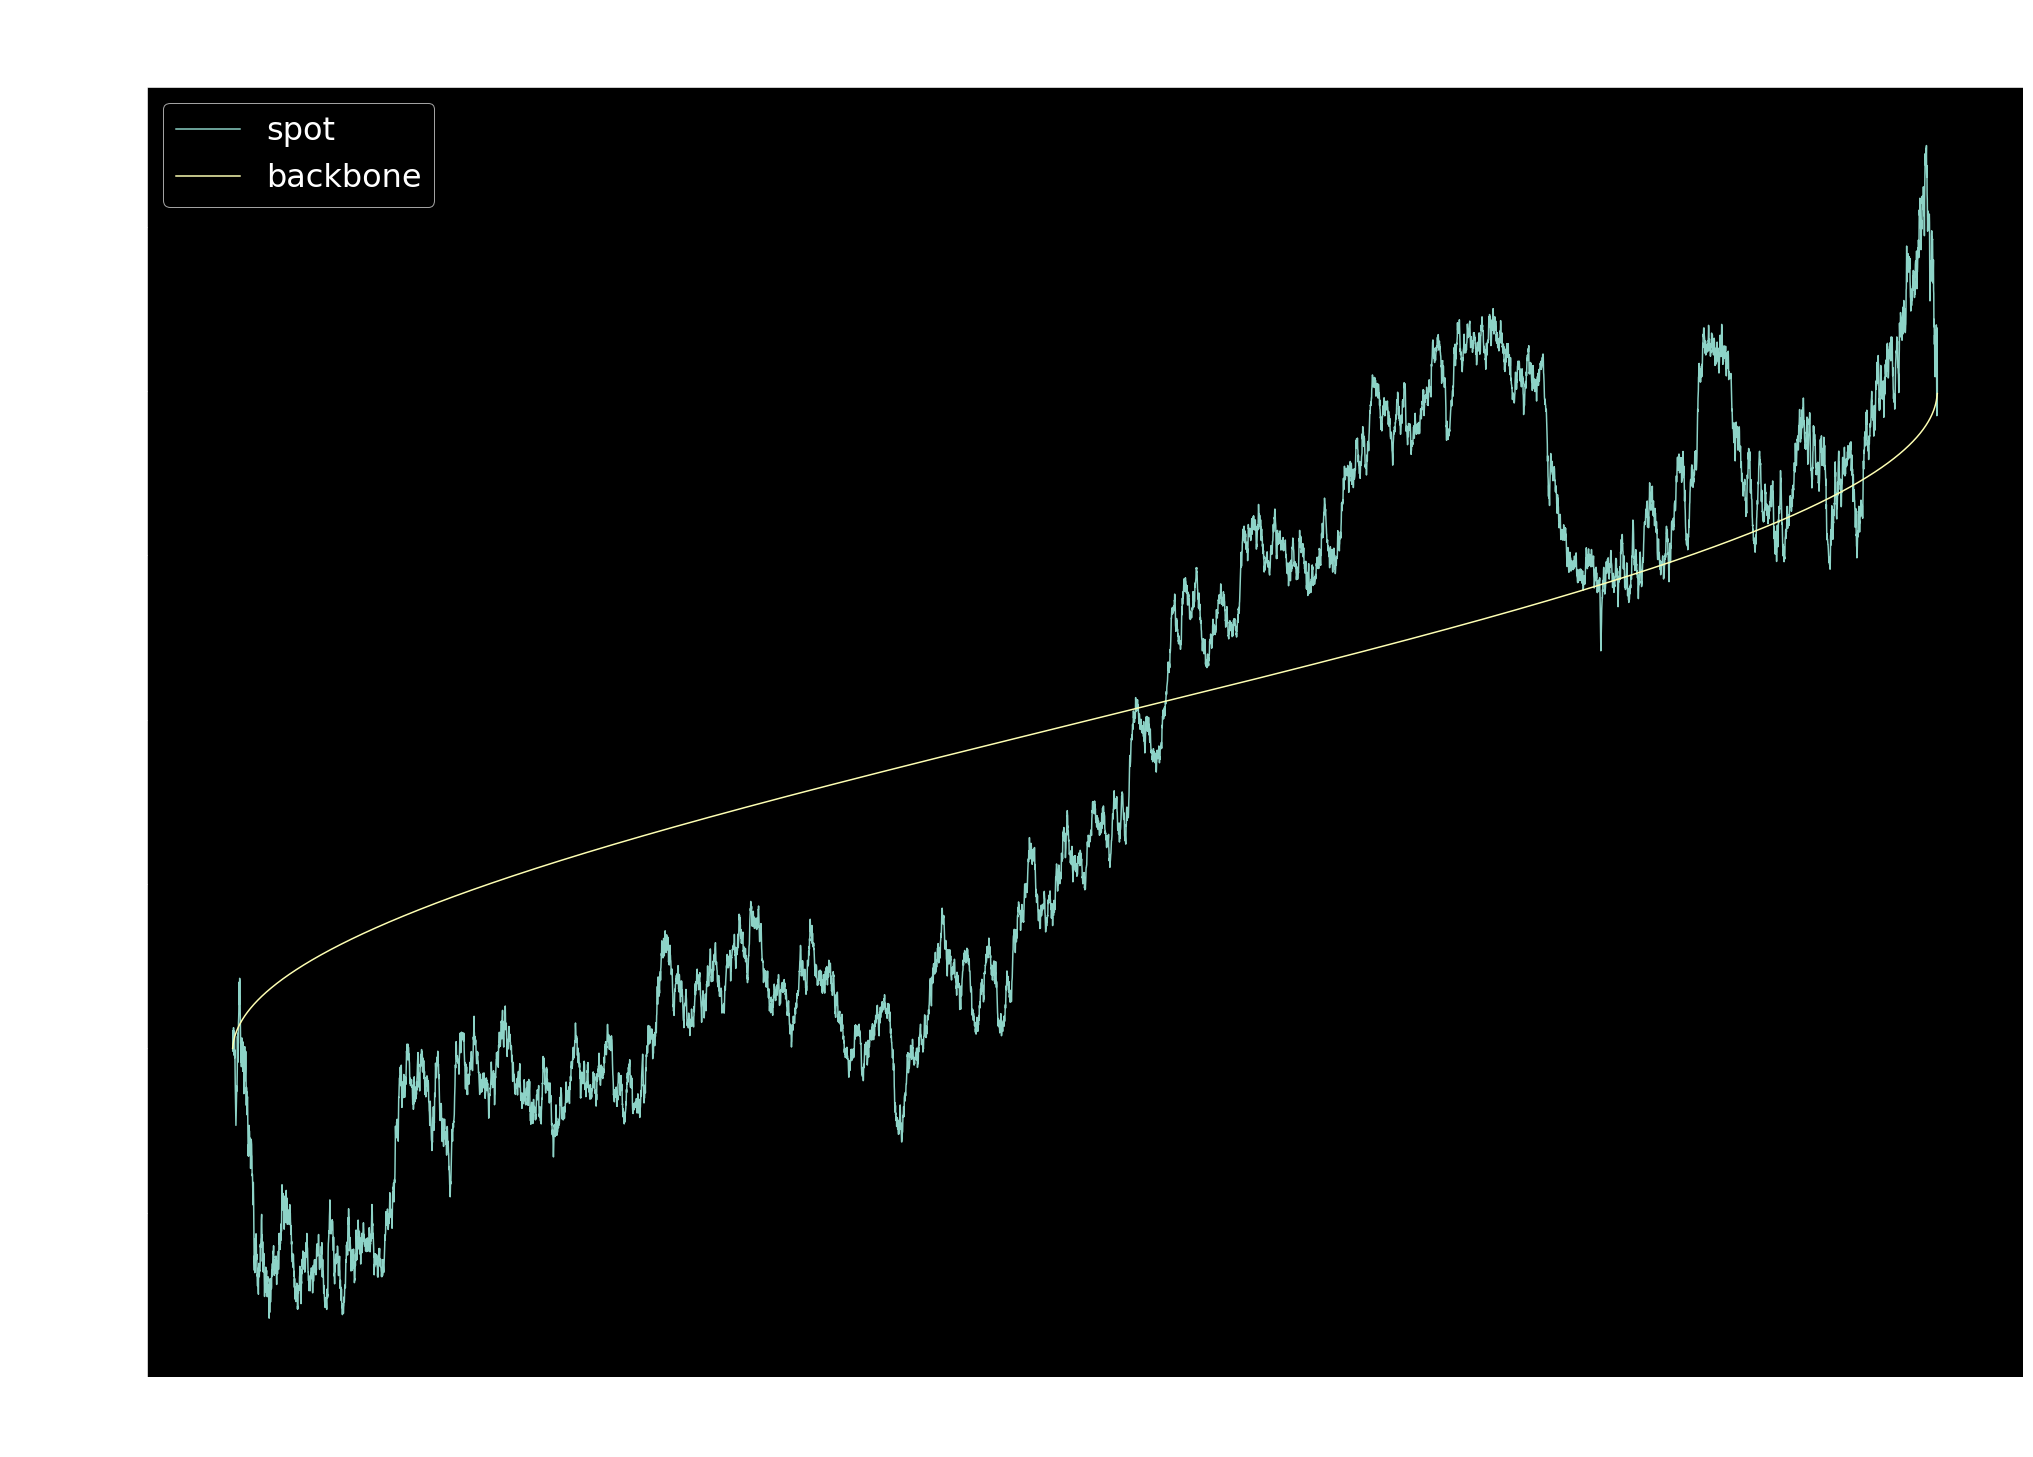

In [5]:
fig, ax = plt.subplots(figsize=(29, 21), nrows=1, ncols=1)

distr = stats.arcsine(loc=0, scale=T)

X = Ito.F_pinned_BM(x0=0, T=T, scheme_steps=SCHEME_STEPS, distr=distr, pin=1)
df = X.simulate()
df.plot(kind='line', ax=ax)

ax.set_xlabel('time', fontsize=FONT_SIZE)
ax.set_ylabel('spot', fontsize=FONT_SIZE)
ax.legend(prop={'size': LEGEND_SIZE})
ax.tick_params(labelsize=FONT_SIZE)
ax.set_title('Arcsine backbone\n')

plt.tight_layout()
plt.show()